# Loss functions (and other things)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

## Cross Entropy loss

also known as the log loss

Cross Entropy Loss measures the difference between two probability distributions: the predicted probability distribution (output of the model) and the true probability distribution (ground truth labels). It is widely used for classification tasks.

**When to use:**

- For classification tasks where the output is a probability distribution over classes (e.g., sentiment analysis, text classification).

- Commonly used in training LLMs for next-token prediction (e.g., GPT models).

### Entropy

Entropy measures the uncertainty or randomness in a probability distribution. It is not a loss function itself but is related to Cross Entropy Loss.

**When to use:**

- Used to analyze the uncertainty in model predictions.

- Can be used in tasks like active learning, where you want to select uncertain samples for labeling.

Entropy measures uncertainty in a probability distribution:

$$H(P) = - \sum_x P(x) \log P(x)$$

In [2]:
def calculate_entropy(p):
    return -np.sum(p * np.log(p))

In [3]:
# Binary distribution
p = np.array([0.5, 0.5])
print(f"Entropy: {calculate_entropy(p):.4f}")

Entropy: 0.6931


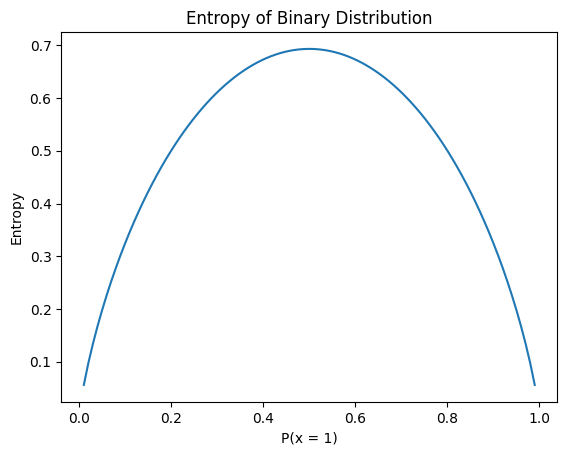

In [4]:
# Visualization
x = np.linspace(0.01, 0.99, 100)
entropies = [calculate_entropy([x_i, 1 - x_i]) for x_i in x]

plt.plot(x, entropies)
plt.title("Entropy of Binary Distribution")
plt.xlabel("P(x = 1)")
plt.ylabel("Entropy")
plt.show()

### KL Divergence

KL Divergence measures how one probability distribution diverges from a reference distribution. It is a non-symmetric measure.

**When to use:**

- For tasks where you want to compare two probability distributions (e.g., in variational inference, reinforcement learning, or fine-tuning LLMs).

- Used in models like Variational Autoencoders (VAEs) or when aligning model outputs with a target distribution.

KL divergence measures how one probability distribution $Q$ diverges from a reference distribution $P$:

$$ D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)} $$

In [5]:
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

In [6]:
# Example distributions
p = np.array([0.1, 0.4, 0.5])
q = np.array([0.2, 0.3, 0.5])

print(f"KL(P||Q): {kl_divergence(p, q):.4f}")

KL(P||Q): 0.0458


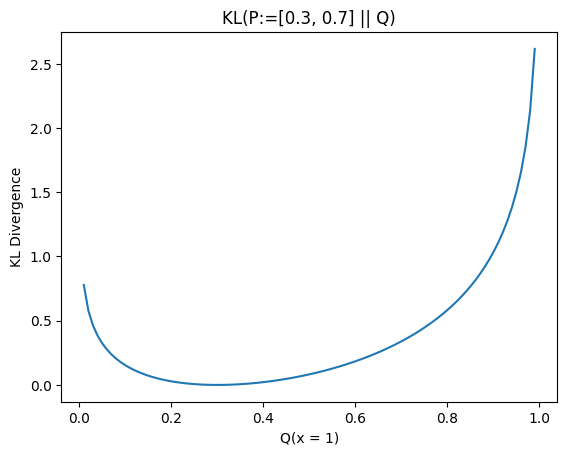

In [7]:
P_X = 0.3  # play with prob
x = np.linspace(0.01, 0.99, 100)
kl_values = [
    kl_divergence(np.array([P_X, 1 - P_X]), np.array([x_val, 1 - x_val]))
    for x_val in x
]

plt.plot(x, kl_values)
plt.title(f"KL(P:=[{P_X}, {1 - P_X}] || Q)")
plt.xlabel("Q(x = 1)")
plt.ylabel("KL Divergence")
plt.show()

### Cross Entropy

Cross Entropy combines entropy and KL divergence:

$$H(P,Q) = H(P) + D_{KL}(P||Q) = -\sum_x P(x) logQ(x)$$

### Binary CE Loss

A special case of Cross Entropy Loss for binary classification tasks, where there are only two classes (e.g., 0 or 1).

**When to use:**

For binary classification tasks (e.g., spam detection, sentiment analysis with positive/negative labels).

$$
L = - \left[ y \log p + (1 - y) \log(1 - p) \right]
$$

In [8]:
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.1, 0.1, 0.8, 0.7])

# Manual calculation
loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
print(f"Manual Loss: {loss:.4f}")

Manual Loss: 0.7469


### Multilabel CE loss

An extension of Cross Entropy Loss for multilabel classification, where each input can belong to multiple classes simultaneously.

**When to use:**

For tasks where each input can have multiple labels (e.g., topic classification, where a document can belong to multiple topics).

$$
L = - \sum_{c=1}^C y_c \log p_c
$$

In [9]:
logits = torch.tensor([[2.0, 1.0, 0.1]])  # model predictions
labels = torch.tensor([2])  # true label

In [10]:
# PyTorch CrossEntropyLoss combine softmax and CE loss
loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(logits, labels)
print(f"Cross Entropy Loss: {loss.item():.4f}")

Cross Entropy Loss: 2.3170


## Triplet loss

Triplet Loss is used to learn embeddings by comparing an anchor, a positive sample (similar to the anchor), and a negative sample (dissimilar to the anchor). The goal is to minimize the distance between the anchor and the positive while maximizing the distance between the anchor and the negative.

**When to use:**

- For tasks requiring similarity learning or representation learning (e.g., sentence similarity, paraphrase detection, or recommendation systems).

- Used in models like Siamese networks or contrastive learning frameworks.

Triplet loss is used to learn embeddings where the *anchor* is closer to the *positive* sample than the *negative* by a margin:

$$ L = \max(d(a,p) - d(a,n) + margin, 0)$$

### Bi- and Cross-Encoder

![](https://raw.githubusercontent.com/lwtztea/ml_pic/9211f0d/week_5/Bi_vs_Cross-Encoder.png)

**Bi-Encoders** produce for a given sentence a sentence embedding. We pass to a BERT independently the sentences A and B, which result in the sentence embeddings u and v. These sentence embedding can then be compared using cosine similarity.

In **Cross-Encoder**, we pass both sentences simultaneously to the Transformer network. It produces then an output value between 0 and 1 indicating the similarity of the input sentence pair.